## Summary of Machine Learning

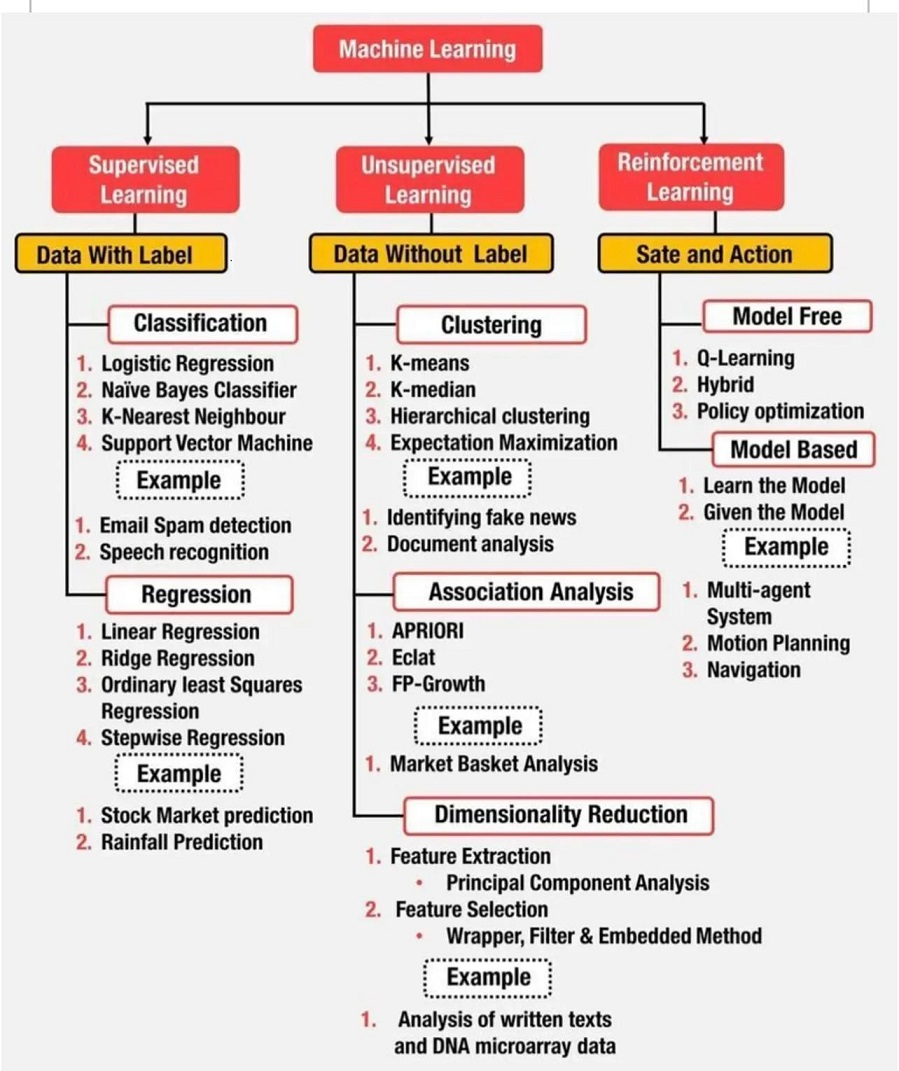

## Supervised Learning Summary

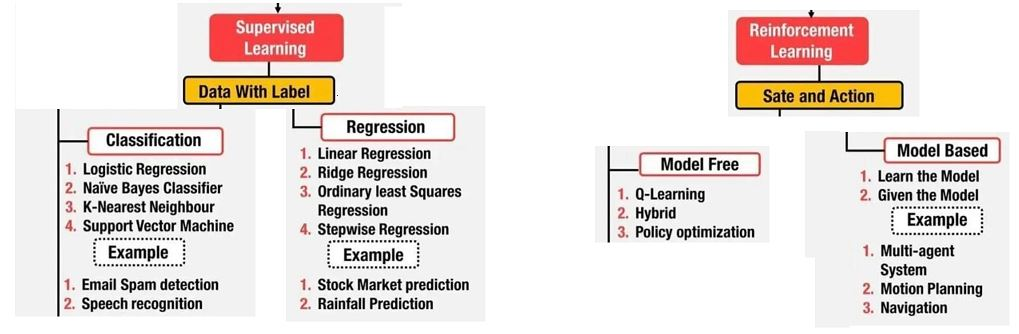

### Transformation of Features

Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ----Global Minima
2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling)
1.ANN--->GLobal Minima, Gradient
2.CNN
3.RNN

0-255 pixels

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation

##### Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

##### Min Max Scaling  (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1.
X_scaled = (X - X.min / (X.max - X.min)

##### Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9
1-10 precentile---10% of all values in this group is less than 1
4-40%

## Bivariate Analysis

### Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area and age.

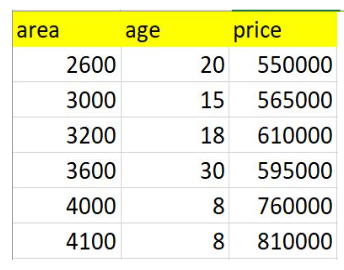

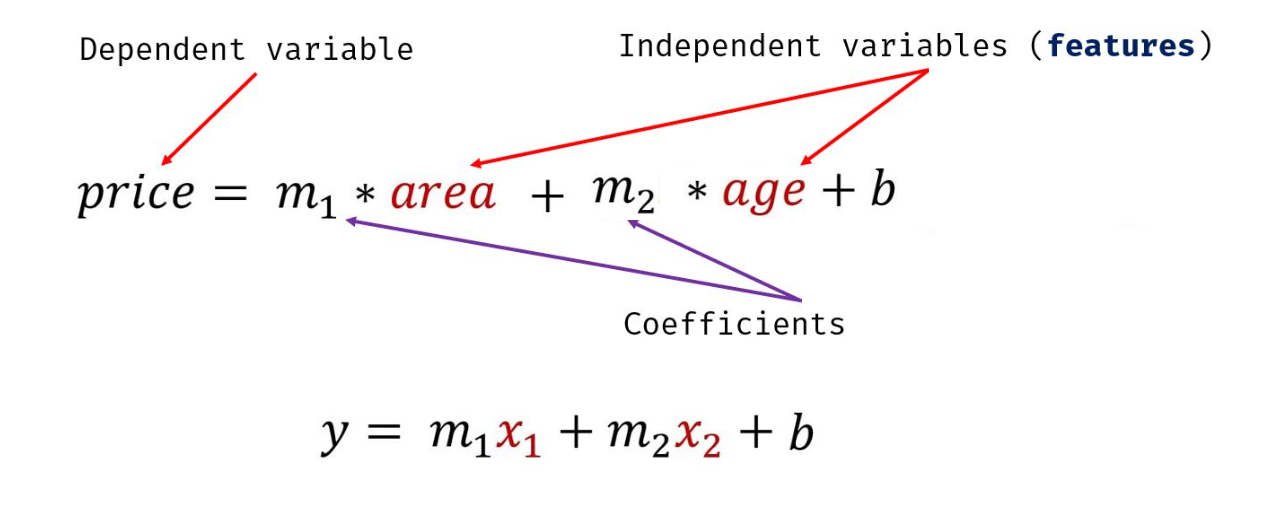

In [ ]:
# 1. For the first case we compare the area and age (independent) with price(dependent)

In [1]:
import numpy as np
import pandas as pd

In [45]:
import warnings
warnings.filterwarnings("ignore")
%pwd

'C:\\Users\\Dr_Sam\\Desktop\\CHM SESSION JULY-NOV 2023\\WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\(WISDOM) Lecture 2- Regressors Algorithm'

In [2]:
df = pd.read_csv('homeprices.csv')
df.head(10)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,4000,5.0,8,760000
4,4100,6.0,8,810000
5,3600,3.0,30,595000


In [4]:
bivariate_df = df[['area', 'age', 'price']][0:5]
bivariate_df

,area,age,price
0,2600,20,550000
1,3000,15,565000
2,3200,18,610000
3,4000,8,760000
4,4100,8,810000


In [5]:
# Extracting the dependent variables (area and price)
biv_X = bivariate_df[['area','age']]
biv_X

,area,age
0,2600,20
1,3000,15
2,3200,18
3,4000,8
4,4100,8


In [6]:
# Extracting the dependent variable (price)
biv_y = df['price'][0:5]
biv_y

0    550000
1    565000
2    610000
3    760000
4    810000
Name: price, dtype: int64

In [7]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,max_error

In [8]:
from time import time

#Import all the availble regressors
from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor,TweedieRegressor
from sklearn.linear_model import ARDRegression, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor 
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [9]:
# Listing the linear regressors
linear_regressors = [
    ARDRegression(), 
    HuberRegressor(),
    LinearRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    Ridge(),
    Lasso(), 
    #SGDRegressor(),
    TheilSenRegressor(),
    TweedieRegressor()
    ]

In [10]:
# Create a list of the available regressor models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)

ensemble_regressors = [
    ExtraTreesRegressor(),
    BaggingRegressor(base_estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
]

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer  
from sklearn.compose import TransformedTargetRegressor
scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    MaxAbsScaler()
]

In [12]:
# Create a dataframe to store the model training performance
perf_index = 0
biv_performance_df = pd.DataFrame(columns= 
                    ['train_time','train_score','test_y','test_pred','pred_error(%)','scale_model'])

In [13]:
test_X = df[['area','age']][5:] #[[3600,30]]
test_y = test_y = df.iat[5,3] #[595000]

# Creating empty dataframe for storage
output_df = pd.DataFrame()
scal_bivariate = pd.DataFrame()
test_df = pd.DataFrame()
scal_testdf = pd.DataFrame()

head = 7

for scaler in scalers:
    # Performing the necessary scaling of the traing and test data
    scal_bivariate[['area','age','price']] = scaler.fit_transform(df[['area','age','price']][0:5]) # training data (5)
    scal_testdf[['area','age','price']] = scaler.transform(df[['area','age','price']][5:]) # test data (1)
    
    print(scaler)
    scal_bivX = scal_bivariate[['area','age']] # independent features
    scal_bivy = scal_bivariate['price'] # Dependent features (target)
    
    for model in linear_regressors:
        start = time() # Training time started
        
        #Create regression object using scaled data
        scale_model = TransformedTargetRegressor(
                                            regressor = model, transformer = scaler)
        scale_model.fit(scal_bivX, scal_bivy)
        train_time = time() - start # Training time ended
        train_score = np.round(scale_model.score(scal_bivX, scal_bivy)*100,2)
        
        start = time() # Prediction time started for training data
        scal_bivariate['y_predict'] = scale_model.predict(scal_bivX)
        predict_time = time()-start # Prediction time ended
        
        # Transforming the training data back to actual values
        output_df[['Area',"Age","Price"]] = df[['area','age','price']][0:5] # actual training data
        output_df[['actual_area','actual_age','pred_price']] = np.round(
                                    scaler.inverse_transform(scal_bivariate[['area','age','y_predict']]))
    
       
        print(model)
        print("Training time: %0.3fs" % train_time)
        #print(final_df)
    
        # Prediction with the test_X = [[3600]].
        scale_test_pred = np.round(scale_model.predict(scal_testdf[['area','age']]),2)
        # Transforming the test data back to actual value
        scal_testdf['y_predict'] = scale_model.predict(scal_testdf[['area','age']]) # actual test data
        test_df[['actual_area','actual_age','pred_price']] = np.round(
                                    scaler.inverse_transform(scal_testdf[['area','age','y_predict']]))
    
        test_pred = test_df['pred_price']
        print(f'Actual value: {test_y}, Predicted value: {test_pred.values[0]}')
   
    
        pred_error = np.round(((test_y/test_pred.values[0])-1)*100,2)
        print(f'Prediction error: {pred_error}%')
        print("Prediction time: %0.3fs" % predict_time)
        print("R2 training score:", train_score)
        
        #final_df = bivariate_df.copy()
        #final_df['y_predict'] = np.round(y_pred)
    
        biv_performance_df.loc[perf_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),scale_model]
        perf_index +=1
        print()
print('Simulation Completed')


StandardScaler()
ARDRegression()
Training time: 0.026s
Actual value: 595000, Predicted value: 697684.0
Prediction error: -14.72%
Prediction time: 0.003s
R2 training score: 95.56

HuberRegressor()
Training time: 0.062s
Actual value: 595000, Predicted value: 710127.0
Prediction error: -16.21%
Prediction time: 0.003s
R2 training score: 95.58

LinearRegression()
Training time: 0.017s
Actual value: 595000, Predicted value: 709849.0
Prediction error: -16.18%
Prediction time: 0.002s
R2 training score: 95.59

PassiveAggressiveRegressor()
Training time: 0.006s
Actual value: 595000, Predicted value: 659644.0
Prediction error: -9.8%
Prediction time: 0.003s
R2 training score: 49.4

RANSACRegressor()
Training time: 0.028s
Actual value: 595000, Predicted value: 709849.0
Prediction error: -16.18%
Prediction time: 0.003s
R2 training score: 95.59

Ridge()
Training time: 0.006s
Actual value: 595000, Predicted value: 563063.0
Prediction error: 5.67%
Prediction time: 0.002s
R2 training score: 93.11

Lasso

In [14]:
biv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

,train_time,train_score,test_y,test_pred,pred_error(%),scale_model
2,0.016997,95.59,595000,709849.0,-16.18,TransformedTargetRegressor(regressor=LinearReg...
4,0.028003,95.59,595000,709849.0,-16.18,TransformedTargetRegressor(regressor=RANSACReg...
11,0.006999,95.59,595000,709849.0,-16.18,TransformedTargetRegressor(regressor=LinearReg...
20,0.020993,95.59,595000,709849.0,-16.18,TransformedTargetRegressor(regressor=LinearReg...
22,0.049999,95.59,595000,709849.0,-16.18,TransformedTargetRegressor(regressor=RANSACReg...
29,0.007004,95.59,595000,709849.0,-16.18,TransformedTargetRegressor(regressor=LinearReg...
31,0.023002,95.59,595000,709849.0,-16.18,TransformedTargetRegressor(regressor=RANSACReg...
28,0.017009,95.58,595000,710026.0,-16.20,TransformedTargetRegressor(regressor=HuberRegr...
1,0.062001,95.58,595000,710127.0,-16.21,TransformedTargetRegressor(regressor=HuberRegr...
10,0.029998,95.58,595000,710098.0,-16.21,TransformedTargetRegressor(regressor=HuberRegr...


In [15]:
test_X = [[3600,30]]
test_y = [595000]
head = 15

for scaler in scalers:
    # Performing the necessary scaling of the traing and test data
    scal_bivariate[['area','age','price']] = scaler.fit_transform(df[['area','age','price']][0:5]) # training data (5)
    scal_testdf[['area','age','price']] = scaler.transform(df[['area','age','price']][5:]) # test data (1)
    
    print(scaler)
    scal_bivX = scal_bivariate[['area','age']] # independent features
    scal_bivy = scal_bivariate['price'] # Dependent features (target)
    
    for model in ensemble_regressors:
        start = time() # Training time started
        
        #Create regression object using scaled data
        scale_model = TransformedTargetRegressor(regressor = model, transformer = scaler)
        scale_model.fit(scal_bivX, scal_bivy)
        train_time = time() - start # Training time ended
        train_score = np.round(scale_model.score(scal_bivX, scal_bivy)*100,2)
        
        start = time() # Prediction time started for training data
        scal_bivariate['y_predict'] = scale_model.predict(scal_bivX)
        predict_time = time()-start # Prediction time ended
        
        # Transforming the training data back to actual values
        output_df[['Area',"Age","Price"]] = df[['area','age','price']][0:5] # actual training data
        output_df[['actual_area','actual_age','pred_price']] = np.round(
                                    scaler.inverse_transform(scal_bivariate[['area','age','y_predict']]))
    
       
        print(model)
        print("Training time: %0.3fs" % train_time)
        #print(final_df)
    
        # Prediction with the test_X = [[3600]].
        scale_test_pred = np.round(scale_model.predict(scal_testdf[['area','age']]),2)
        # Transforming the test data back to actual value
        scal_testdf['y_predict'] = scale_model.predict(scal_testdf[['area','age']]) # actual test data
        test_df[['actual_area','actual_age','pred_price']] = np.round(
                                    scaler.inverse_transform(scal_testdf[['area','age','y_predict']]))
    
        test_pred = test_df['pred_price']
        print(f'Actual value: {test_y}, Predicted value: {test_pred.values[0]}')
   
    
        pred_error = np.round(((test_y/test_pred.values[0])-1)*100,2)
        print(f'Prediction error: {pred_error}%')
        print("Prediction time: %0.3fs" % predict_time)
        print("R2 training score:", train_score)
        
        #final_df = bivariate_df.copy()
        #final_df['y_predict'] = np.round(y_pred)
    
        biv_performance_df.loc[perf_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),scale_model]
        perf_index +=1
        print()
print('Simulation Completed')


StandardScaler()
ExtraTreesRegressor()
Training time: 0.194s
Actual value: [595000], Predicted value: 631600.0
Prediction error: [-5.79]%
Prediction time: 0.019s
R2 training score: 100.0



C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=ExtraTreesRegressor())
Training time: 2.611s
Actual value: [595000], Predicted value: 627650.0
Prediction error: [-5.2]%
Prediction time: 0.176s
R2 training score: 96.27

GradientBoostingRegressor(learning_rate=0.3)
Training time: 0.072s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.003s
R2 training score: 100.0

DecisionTreeRegressor()
Training time: 0.003s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.002s
R2 training score: 100.0

RandomForestRegressor()
Training time: 0.278s
Actual value: [595000], Predicted value: 627450.0
Prediction error: [-5.17]%
Prediction time: 0.035s
R2 training score: 96.45

AdaBoostRegressor()
Training time: 0.033s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.005s
R2 training score: 100.0

KNeighborsRegressor()
Training time: 0.004s
Actual value: [595000], Predicted value: 659

C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=ExtraTreesRegressor())
Training time: 2.729s
Actual value: [595000], Predicted value: 625950.0
Prediction error: [-4.94]%
Prediction time: 0.165s
R2 training score: 96.81

GradientBoostingRegressor(learning_rate=0.3)
Training time: 0.144s
Actual value: [595000], Predicted value: 665334.0
Prediction error: [-10.57]%
Prediction time: 0.011s
R2 training score: 100.0

DecisionTreeRegressor()
Training time: 0.011s
Actual value: [595000], Predicted value: 760000.0
Prediction error: [-21.71]%
Prediction time: 0.004s
R2 training score: 100.0

RandomForestRegressor()
Training time: 0.635s
Actual value: [595000], Predicted value: 663350.0
Prediction error: [-10.3]%
Prediction time: 0.013s
R2 training score: 97.47

AdaBoostRegressor()
Training time: 0.063s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.006s
R2 training score: 100.0

KNeighborsRegressor()
Training time: 0.003s
Actual value: [595000], Predicted value: 

C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=ExtraTreesRegressor())
Training time: 2.434s
Actual value: [595000], Predicted value: 621285.0
Prediction error: [-4.23]%
Prediction time: 0.120s
R2 training score: 97.35

GradientBoostingRegressor(learning_rate=0.3)
Training time: 0.063s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.003s
R2 training score: 100.0

DecisionTreeRegressor()
Training time: 0.005s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.002s
R2 training score: 100.0

RandomForestRegressor()
Training time: 0.254s
Actual value: [595000], Predicted value: 625500.0
Prediction error: [-4.88]%
Prediction time: 0.015s
R2 training score: 97.73

AdaBoostRegressor()
Training time: 0.045s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.007s
R2 training score: 100.0

KNeighborsRegressor()
Training time: 0.008s
Actual value: [595000], Predicted value: 65

C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=ExtraTreesRegressor())
Training time: 1.747s
Actual value: [595000], Predicted value: 637875.0
Prediction error: [-6.72]%
Prediction time: 0.191s
R2 training score: 96.56

GradientBoostingRegressor(learning_rate=0.3)
Training time: 0.077s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.001s
R2 training score: 100.0

DecisionTreeRegressor()
Training time: 0.003s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.002s
R2 training score: 100.0

RandomForestRegressor()
Training time: 0.233s
Actual value: [595000], Predicted value: 612250.0
Prediction error: [-2.82]%
Prediction time: 0.011s
R2 training score: 96.57

AdaBoostRegressor()
Training time: 0.076s
Actual value: [595000], Predicted value: 610000.0
Prediction error: [-2.46]%
Prediction time: 0.005s
R2 training score: 100.0

KNeighborsRegressor()
Training time: 0.003s
Actual value: [595000], Predicted value: 65

In [16]:
# Printing the Dataframe and sorting in decending order by training score
biv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

,train_time,train_score,test_y,test_pred,pred_error(%),scale_model
38,0.071999,100.00,[595000],610000.0,-2.46,TransformedTargetRegressor(regressor=GradientB...
39,0.002997,100.00,[595000],610000.0,-2.46,TransformedTargetRegressor(regressor=DecisionT...
41,0.032998,100.00,[595000],610000.0,-2.46,TransformedTargetRegressor(regressor=AdaBoostR...
49,0.062998,100.00,[595000],610000.0,-2.46,TransformedTargetRegressor(regressor=AdaBoostR...
54,0.062999,100.00,[595000],610000.0,-2.46,TransformedTargetRegressor(regressor=GradientB...
...,...,...,...,...,...,...
50,0.002997,0.00,[595000],659000.0,-9.71,TransformedTargetRegressor(regressor=KNeighbor...
58,0.008001,0.00,[595000],659000.0,-9.71,TransformedTargetRegressor(regressor=KNeighbor...
66,0.003000,0.00,[595000],659000.0,-9.71,TransformedTargetRegressor(regressor=KNeighbor...
21,0.008534,-40.62,595000,959391.0,-37.98,TransformedTargetRegressor(regressor=PassiveAg...


### (1) Predict price of a home with area = 5000 sqr ft and age = 12

In [17]:
# Don't run

In [18]:
biv_predictor = GradientBoostingRegressor(learning_rate=0.3)
biv_predictor.fit(biv_X, biv_y)

GradientBoostingRegressor(learning_rate=0.3)

In [19]:
biv_predictor_score = biv_predictor.score(biv_X, biv_y)
biv_predictor.predict([[5000,12]])

C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([704146.27846288])

<h2 style="color:green" align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age.

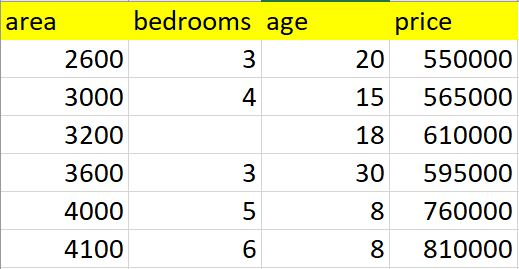

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

#### We will use regression with multiple variables here. Price can be calculated using following equation,


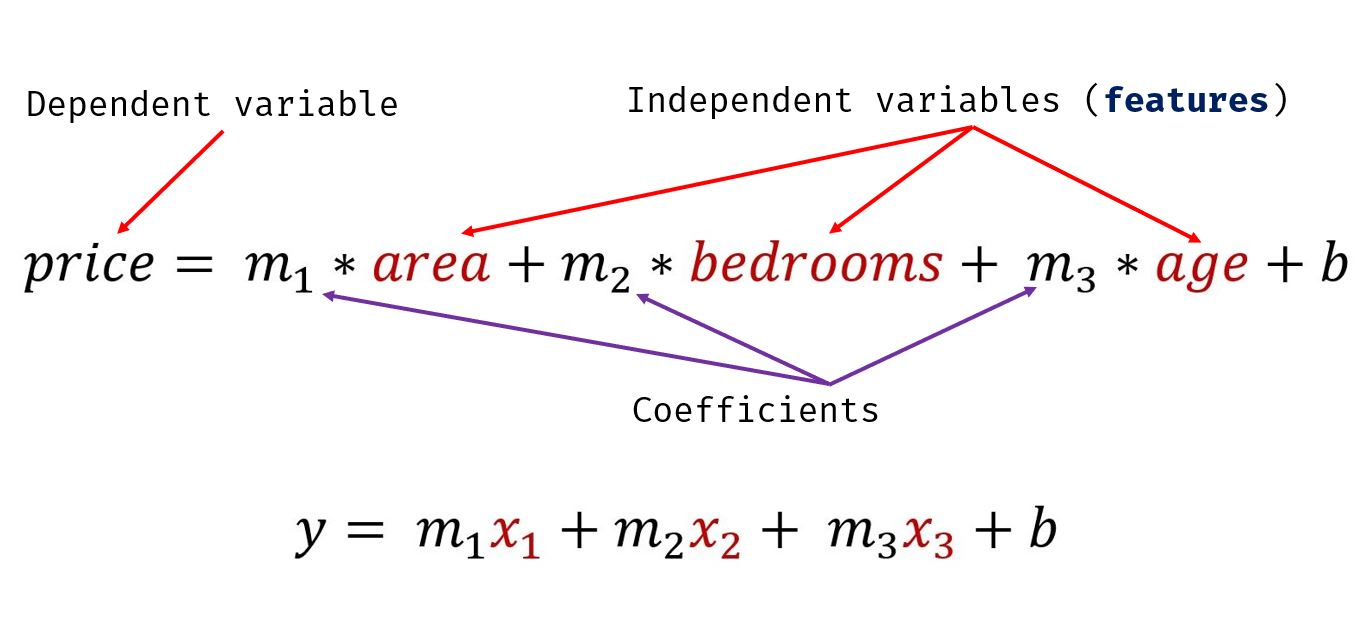

In [20]:
multivariate_df = df[['area', 'bedrooms', 'age', 'price']]
multivariate_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,4000,5.0,8,760000
4,4100,6.0,8,810000
5,3600,3.0,30,595000


In [21]:
# Extracting the column names
multivariate_df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [22]:
# Identifiying columns with Nan Values
for cols in multivariate_df.columns:
    print(f'\t{cols:<10}: {multivariate_df[cols].isna().sum()} NaN Values')

	area      : 0 NaN Values
	bedrooms  : 1 NaN Values
	age       : 0 NaN Values
	price     : 0 NaN Values


### Data Preprocessing: Fill NA values with median value of a column

In [23]:
multivariate_df.bedrooms.median()

4.0

In [24]:
multivariate_df.bedrooms = multivariate_df.bedrooms.fillna(multivariate_df.bedrooms.median())
multivariate_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,4000,5.0,8,760000
4,4100,6.0,8,810000
5,3600,3.0,30,595000


In [25]:
# Identifiying columns with Nan Values
for cols in multivariate_df.columns:
    print(f'\t{cols:<10}: {multivariate_df[cols].isna().sum()} NaN Values')

	area      : 0 NaN Values
	bedrooms  : 0 NaN Values
	age       : 0 NaN Values
	price     : 0 NaN Values


In [26]:
# Extracting the dependent variables (area and price)
multiv_X = multivariate_df[['area','bedrooms','age']]
multiv_X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,4000,5.0,8
4,4100,6.0,8
5,3600,3.0,30


In [27]:
# Extracting the dependent variable (price)
multiv_y = multivariate_df['price']
multiv_y

0    550000
1    565000
2    610000
3    760000
4    810000
5    595000
Name: price, dtype: int64

In [28]:
# Extracting the training data from the Dataframe
train_X = multiv_X[0:5] # row o to 4 (5 records)
train_y = multiv_y[0:5] # row o to 4 (5 records)

In [29]:
train_X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,4000,5.0,8
4,4100,6.0,8


In [30]:
train_y

0    550000
1    565000
2    610000
3    760000
4    810000
Name: price, dtype: int64

In [31]:
# Extracting the test data from the Dataframe
test_X = multiv_X[5:] # row 5 toend (1 record)
test_y = multiv_y[5:] # row 5 toend (1 record)
test_X

,area,bedrooms,age
5,3600,3.0,30


In [32]:
test_y

5    595000
Name: price, dtype: int64

In [33]:
from time import time

from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [34]:
linear_regressors = [
    ARDRegression(), 
    HuberRegressor(),
    LinearRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    Ridge(),
    Lasso(), 
    #SGDRegressor(),
    TheilSenRegressor(),
    TweedieRegressor()
    ]

In [35]:
# Create a list of the available regressor models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)

ensemble_regressors = [
    ExtraTreesRegressor(),
    BaggingRegressor(estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
]

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer  
from sklearn.compose import TransformedTargetRegressor
scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    MaxAbsScaler()
]

In [37]:
# Create a dataframe to store the model training performance
perf_index = 0
multiv_performance_df = pd.DataFrame(columns= 
                    ['train_time','train_score','test_y','test_pred','pred_error(%)','scale_model'])

In [38]:
# Creating empty dataframe for storage
output_df = pd.DataFrame()
scal_multivariate = pd.DataFrame()
test_df = pd.DataFrame()
scal_testdf = pd.DataFrame()

head = 7

for scaler in scalers:
    # Performing the necessary scaling of the traing and test data
    scal_multivariate[['area','bedrooms','age','price']] = scaler.fit_transform(
                                multivariate_df[['area','bedrooms','age','price']][0:5]) # training data (5)
    scal_testdf[['area','bedrooms','age','price']] = scaler.transform(
                                multivariate_df[['area','bedrooms','age','price']][5:]) # test data (1)
    
    print(scaler)
    scal_multivX = scal_multivariate[['area','bedrooms','age']] # Independent Features
    scal_multivy = scal_multivariate['price'] # Dependent features
    
    for model in linear_regressors[:head]:
        start = time() # Training time started
        
        #Create regression object using scaled data
        scale_model = TransformedTargetRegressor(
            regressor = model, transformer = scaler)
        scale_model.fit(scal_multivX, scal_multivy)
        train_time = time() - start # Training time ended
        train_score = np.round(scale_model.score(scal_multivX, scal_multivy)*100,2)
        
        start = time() # Prediction time started for training data
        scal_multivariate['y_predict'] = scale_model.predict(scal_multivX)
        predict_time = time()-start # Prediction time ended
        
        # Transforming the training data back to actual values
        output_df[['area','bedrooms','age','price']] = df[['area','bedrooms','age','price']][0:5] # actual training data
        output_df[['actual_area','actual_bedrooms','actual_age','pred_price']] = np.round(
                                    scaler.inverse_transform(scal_multivariate[['area','bedrooms','age','y_predict']]))
    
       
        print(model)
        print("Training time: %0.3fs" % train_time)
        #print(final_df)
    
        # Prediction with the test_X = [[3600]].
        scale_test_pred = np.round(scale_model.predict(scal_testdf[['area','bedrooms','age']]),2)
        # Transforming the test data back to actual value
        scal_testdf['y_predict'] = scale_model.predict(scal_testdf[['area','bedrooms','age']]) # actual test data
        test_df[['actual_area','actual_bedrooms','actual_age','pred_price']] = np.round(
                                    scaler.inverse_transform(scal_testdf[['area','bedrooms','age','y_predict']]))
    
        test_pred = test_df['pred_price']
        print(f'Actual value: {test_y.values[0]}, Predicted value: {test_pred.values[0]}')
   
        #print('test and pred',test_y, test_pred)
        pred_error = np.round(((test_y.values[0]/test_pred.values[0])-1)*100,2)
        print(f'Prediction error: {pred_error}%')
        print("Prediction time: %0.3fs" % predict_time)
        print("R2 training score:", train_score)
        
        #final_df = multivariate_df[0:5].copy()
        #final_df['y_predict'] = np.round(y_pred)
    
        multiv_performance_df.loc[perf_index] = \
                            [train_time,train_score,test_y.values[0],test_pred.item(),pred_error.item(),scale_model]
        perf_index +=1
        print()
print('Simulation Completed')


StandardScaler()
ARDRegression()
Training time: 0.013s
Actual value: 595000, Predicted value: 697427.0
Prediction error: -14.69%
Prediction time: 0.003s
R2 training score: 95.57

HuberRegressor()
Training time: 0.081s
Actual value: 595000, Predicted value: 571510.0
Prediction error: 4.11%
Prediction time: 0.002s
R2 training score: 94.19

LinearRegression()
Training time: 0.005s
Actual value: 595000, Predicted value: 691965.0
Prediction error: -14.01%
Prediction time: 0.001s
R2 training score: 95.74

PassiveAggressiveRegressor()
Training time: 0.006s
Actual value: 595000, Predicted value: 718056.0
Prediction error: -17.14%
Prediction time: 0.002s
R2 training score: 84.73

RANSACRegressor()
Training time: 0.064s
Actual value: 595000, Predicted value: 402778.0
Prediction error: 47.72%
Prediction time: 0.004s
R2 training score: 86.7

Ridge()
Training time: 0.008s
Actual value: 595000, Predicted value: 551994.0
Prediction error: 7.79%
Prediction time: 0.002s
R2 training score: 94.05

Lasso(

In [39]:
multiv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

,train_time,train_score,test_y,test_pred,pred_error(%),scale_model
2,0.004999,95.74,595000,691965.0,-14.01,TransformedTargetRegressor(regressor=LinearReg...
9,0.005999,95.74,595000,691965.0,-14.01,TransformedTargetRegressor(regressor=LinearReg...
16,0.009997,95.74,595000,691965.0,-14.01,TransformedTargetRegressor(regressor=LinearReg...
23,0.010001,95.74,595000,691965.0,-14.01,TransformedTargetRegressor(regressor=LinearReg...
14,0.010000,95.57,595000,697227.0,-14.66,TransformedTargetRegressor(regressor=ARDRegres...
21,0.018994,95.57,595000,697261.0,-14.67,TransformedTargetRegressor(regressor=ARDRegres...
0,0.013000,95.57,595000,697427.0,-14.69,TransformedTargetRegressor(regressor=ARDRegres...
7,0.008001,95.57,595000,697463.0,-14.69,TransformedTargetRegressor(regressor=ARDRegres...
8,0.071000,94.21,595000,549960.0,8.19,TransformedTargetRegressor(regressor=HuberRegr...
22,0.023007,94.19,595000,552988.0,7.60,TransformedTargetRegressor(regressor=HuberRegr...


In [40]:
for scaler in scalers:
    # Performing the necessary scaling of the traing and test data
    scal_multivariate[['area','bedrooms','age','price']] = scaler.fit_transform(
                                multivariate_df[['area','bedrooms','age','price']][0:5]) # training data (5)
    scal_testdf[['area','bedrooms','age','price']] = scaler.transform(
                                multivariate_df[['area','bedrooms','age','price']][5:]) # test data (1)
    
    print(scaler)
    scal_multivX = scal_multivariate[['area','bedrooms','age']] # Independent Features
    scal_multivy = scal_multivariate['price'] # Dependent features (target)
    
    for model in ensemble_regressors[:head]:
        start = time() # Training time started
        
        #Create regression object using scaled data
        scale_model = TransformedTargetRegressor(
            regressor = model, transformer = scaler)
        scale_model.fit(scal_multivX, scal_multivy)
        train_time = time() - start # Training time ended
        train_score = np.round(scale_model.score(scal_multivX, scal_multivy)*100,2)
        
        start = time() # Prediction time started for training data
        scal_multivariate['y_predict'] = scale_model.predict(scal_multivX)
        predict_time = time()-start # Prediction time ended
        
        # Transforming the training data back to actual values
        output_df[['area','bedrooms','age','price']] = df[['area','bedrooms','age','price']][0:5] # actual training data
        output_df[['actual_area','actual_bedrooms','actual_age','pred_price']] = np.round(
                                    scaler.inverse_transform(scal_multivariate[['area','bedrooms','age','y_predict']]))
    
       
        print(model)
        print("Training time: %0.3fs" % train_time)
        #print(final_df)
    
        # Prediction with the test_X = [[3600]].
        scale_test_pred = np.round(scale_model.predict(scal_testdf[['area','bedrooms','age']]),2)
        # Transforming the test data back to actual value
        scal_testdf['y_predict'] = scale_model.predict(scal_testdf[['area','bedrooms','age']]) # actual test data
        test_df[['actual_area','actual_bedrooms','actual_age','pred_price']] = np.round(
                                    scaler.inverse_transform(scal_testdf[['area','bedrooms','age','y_predict']]))
    
        test_pred = test_df['pred_price']
        print(f'Actual value: {test_y.values[0]}, Predicted value: {test_pred.values[0]}')
   
        #print('test and pred',test_y, test_pred)
        pred_error = np.round(((test_y.values[0]/test_pred.values[0])-1)*100,2)
        print(f'Prediction error: {pred_error}%')
        print("Prediction time: %0.3fs" % predict_time)
        print("R2 training score:", train_score)
        
        #final_df = multivariate_df[0:5].copy()
        #final_df['y_predict'] = np.round(y_pred)
    
        multiv_performance_df.loc[perf_index] = \
                            [train_time,train_score,test_y.values[0],test_pred.item(),pred_error.item(),scale_model]
        perf_index +=1
        print()
print('Simulation Completed')


StandardScaler()
ExtraTreesRegressor()
Training time: 0.298s
Actual value: 595000, Predicted value: 617200.0
Prediction error: -3.6%
Prediction time: 0.026s
R2 training score: 100.0

BaggingRegressor(estimator=ExtraTreesRegressor())
Training time: 2.084s
Actual value: 595000, Predicted value: 601025.0
Prediction error: -1.0%
Prediction time: 0.140s
R2 training score: 85.2

GradientBoostingRegressor(learning_rate=0.3)
Training time: 0.091s
Actual value: 595000, Predicted value: 610000.0
Prediction error: -2.46%
Prediction time: 0.001s
R2 training score: 100.0

DecisionTreeRegressor()
Training time: 0.007s
Actual value: 595000, Predicted value: 610000.0
Prediction error: -2.46%
Prediction time: 0.001s
R2 training score: 100.0

RandomForestRegressor()
Training time: 0.247s
Actual value: 595000, Predicted value: 604600.0
Prediction error: -1.59%
Prediction time: 0.012s
R2 training score: 96.94

AdaBoostRegressor()
Training time: 0.107s
Actual value: 595000, Predicted value: 610000.0
Predic

In [41]:
# Printing the Dataframe and sorting in decending order by training score
multiv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

,train_time,train_score,test_y,test_pred,pred_error(%),scale_model
30,0.091001,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=GradientB...
31,0.006998,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=DecisionT...
33,0.106999,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=AdaBoostR...
38,0.005998,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=DecisionT...
40,0.049000,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=AdaBoostR...
44,0.113998,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=GradientB...
45,0.003995,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=DecisionT...
47,0.150003,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=AdaBoostR...
51,0.088597,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=GradientB...
52,0.004003,100.00,595000,610000.0,-2.46,TransformedTargetRegressor(regressor=DecisionT...


In [44]:
multiv_performance_df['scale_model'].iloc[32:33]

32    TransformedTargetRegressor(regressor=RandomFor...
Name: scale_model, dtype: object

In [ ]:
# Using the best model for prediction
multivariate_predictor =  ExtraTreesRegressor(random_state=1720861042)
multivariate_predictor.fit(train_X, train_y)

In [ ]:
y_pred = multivariate_predictor.predict(multivariate_df[['area','bedrooms','age']][0:5])
multivariate_df = df[0:5].copy()
multivariate_df['y_predict'] = y_pred
multivariate_df

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [ ]:
X_test =[[3000, 3, 40]]
multivariate_predictor.predict(X_test)

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [ ]:
multivariate_predictor.predict([[2500, 4, 5]])